# Softmax Regression

Suppose you want to write a program
that will classify handwritten drawing of
digits into their appropriate category: **0**, **1**, **2**, ..., **9**.

You could, think hard about the nature of
digits, try to determine the logic of what
indicates what kind of digit, and write a
program to codify this logic. Or you could take advantage of the **statistics** of the data, e.g. pixel intensity in a 28 x 28 grid as discriminative features of each instance.

<img src="img/02-1.png">

## ML as data-driven programming

**ML approach:** Collect a training set of images with known labels
and feed these into a machine learning algorithm, which, if done well, will automatically produce a "program" that solves this task. The  said program includes a large number of [magic numbers](https://en.wikipedia.org/wiki/Magic_number_(programming)), but it nonetheless performs a sequence of computations to determine the output class.

<img src="img/02-2.png">

## Three ingredients of a ML algorithm

Every machine learning algorithm consists of three different elements:

1. **Hypothesis class** ($\mathcal{H}$). The "program structure", parameterized via a set of
parameters, that describes how we map inputs (e.g. images of digits) to
outputs (e.g. class labels, or probabilities of different class labels). Formally, $\mathcal{H} = \{h_\Theta \mid \Theta \in \mathbb{R}^d \}$ where $h_\Theta(\mathbf{x}) = \hat{y}$ or $\hat{\mathbf{p}}$ for an input $\mathbf{x}.$

2. **Loss function** ($\ell$). A function that specifies how "well" a given **hypothesis** (i.e. a choice of parameters) performs on the task of interest. Thus, we have the **loss** $\mathcal{L}(h_\Theta, \mathcal{D})$ where $\mathcal{D} = \{(\mathbf{x}_i, y_i)\}_{i=1}^N \subset \mathcal{X} \times \mathcal{Y}$ is a finite subset of size $N$ of the product of the input space $\mathcal{X}$ and target space $\mathcal{Y}.$ The loss is expressed in terms of a pointwise **loss function** $\ell$ such that:
$$\mathcal{L}(h_\Theta, \mathcal{D}) = \frac{1}{N}\sum_{i=1}^N \ell(h_\Theta(\mathbf{x}_i), y_i)$$
where $\ell$ outputs nonnegative real numbers and $\ell \to 0$ whenever the predictions are accurate, otherwise $\ell \to \infty$ as the predictions become increasingly worse.

4. **An optimization method.** A procedure for determining a set of parameters
that (approximately) minimize the training loss:
$$\Theta^* \approx {\text{argmin}}_{\Theta} \; \mathcal{L}(h_\Theta, \mathcal{D}).$$ Note that the training dataset is fixed while we vary the parameters to determine a suitable hypothesis.
The exact procedure for finding the optimal parameters $\Theta^*$ depends on an optimization algorithm. For deep learning, this is typically SGD and its variants.

## Multi-class classification

In a multi-class classification setting, we have a **training dataset** $\mathcal{D}$ that consist of input-output pairs
$\mathcal{D} = \mathcal{X} \times \mathcal{Y} = \{(\mathbf{x}_i, y_i) \mid i = 1, \ldots, N \}$ such that $\mathbf{x}_i \in \mathbb{R}^d$ where $d$ is the **input dimensionality** and $y_i \in [1, K] \subset \mathbb{Z}$ where $K$ is the **number of classes**. Here $N = | \mathcal{D} |$ is the size of the dataset.

A **hypothesis function** $h$ in this setting maps inputs $\mathbf{x}$ to $K$-dimensional vectors:
$h \colon \; \mathbb{R}^d \to \mathbb{R}^K.$
The output $h_j(\mathbf{x})$ indicates some measure of "belief" in how much likely the label is to be class $j$. That is, the most likely class for an input $\mathbf{x}$ is predicted as the coordinate $\hat{j} = \text{argmax}_j \; h_j(\mathbf{x})$.

**Example.** For MNIST, $d = 28 \times 28 = 784$, $K = 10$ and $M = 60,000.$

## Linear hypothesis class

A **linear hypothesis function** uses a linear operator (i.e. matrix multiplication) for this transformation:

$$h_\Theta(\mathbf{x}) = \Theta^\top \mathbf{x}$$

for parameters $\Theta \in \mathbb{R}^{d \times K}.$ In practice, we usually write this using matrix-batch notation since we process inputs in parallel as a matrix:

$$h_\Theta(\mathbf{X}) = \mathbf{X} \Theta$$

where 

$$
\begin{equation}
\mathbf{X}=\left[\begin{array}{c}
-\, \mathbf{x}^{(1)\top}- \\
\vdots \\
-\, \mathbf{x}^{(M)\top}-
\end{array}\right] \in \mathbb{R}^{M \times d}
\end{equation}.
$$

That is, the inputs are laid out as row vectors inside the matrix. This allows us to multiply the parameter matrix without transposing:

$$
h_\Theta(\mathbf{X}) =  \underbrace{\mathbf{X}}_{\mathbb{R}^{M \times d}} \; \underbrace{\Theta}_{\mathbb{R}^{d \times K}} \in \mathbb{R}^{M \times K}.
$$

This makes sense, we have $M$ vectors of length $K.$ Note that geometrically each $\Theta_j = \Theta_{[:, j]} \in \mathbb{R}^d$ defines a separating hyperplane for class $j \in [K].$ So a linear hypothesis class is able to learn to separate linearly separable data points in $\mathbb{R}^d$ using $K$ separating hyperplanes by assigning a score $s_j = \Theta_j^\top \mathbf{x} \in \mathbb{R}$ based on its weighted distance from the hyperplane.

## Loss functions, softmax, and cross-entropy

The simplest loss is just the **classification error**: 
$$\ell_{\text{err}} = 1 - [[\operatorname{argmax}_i h_i(\mathbf{x})= y]] \in \{0, 1\}.$$

We typically use this loss function to assess the quality of classifiers. Unfortunately, the error is a bad loss function to use for optimization, because it is not differentiable, i.e. we can smoothly adjust the parameters without seeing a change in $\ell_{\text{err}}$ or that it changes abruptly.



Instead, we look at the probabilities assigned by the model to each class. To do this, we have to convert the class scores to probabilities exponentiating and
normalizing its entries (i.e. making $\sum_j p = 1$ s.t. $p_j \geq 0$). Class scores $h_j(\mathbf{x}) = \Theta_j^\top \mathbf{x}$ are exponentiated before normalizing:

$$
p_j = \frac{\exp(h_j(\mathbf{x}))}{\sum_l \exp(h_l(\mathbf{x}))} \eqqcolon \text{Softmax} (h(\mathbf{x}))_j.
$$

Then, the **cross-entropy loss** is given by the negative log of the probability of the true class $y$:

$$
\begin{aligned}
\ell_{\text{CE}}(h(\mathbf{x}), y) 
&= -\log \text{Softmax} (h(\mathbf{x}))_y \\
&= -h_y(\mathbf{x})+\log \sum_{j=1}^K \exp \left(h_j(\mathbf{x})\right).
\end{aligned}
$$

**Remark.** Exponentiating means that scores does not scale linearly. In fact, 

$$
p_j = \frac{\exp(\Delta h_j(\mathbf{x}))}{\sum_l \exp(\Delta h_l(\mathbf{x}))}
$$

where $\Delta h_l(\mathbf{x}) = h_l(\mathbf{x}) - \max_{m} h_m(\mathbf{x}).$ This prevents both underflow and overflow with $\log (1 + \sum a_j)$ where $0 < a_j \leq 1$, but also shows that the individual scores scale exponentially with the diff from the largest score. Hence, this transformation is sometimes called soft-*arg*max.

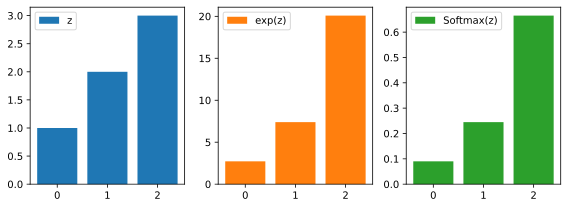

In [1]:
%config InlineBackend.figure_formats = ['svg'] 
import torch
import matplotlib.pyplot as plt

z = torch.tensor([1, 2, 3]).float()
fig, ax = plt.subplots(1, 3, figsize=(8, 3))
ax[0].bar(range(3), z.numpy(), label="z")
ax[1].bar(range(3), z.exp().numpy(), color="C1", label="exp(z)")
ax[2].bar(range(3), z.exp().numpy() / z.exp().numpy().sum(), color="C2", label="Softmax(z)")
ax[0].legend(); ax[1].legend(); ax[2].legend();
fig.tight_layout()

Finally, taking the negative log of the true class suffices since we have the constraint $\sum p_j = 1.$ Moreover, $p_y = 1$ implies $\ell_{\text{ce}} = -\log 1 = 0$ while $p_y = 0$ implies $-\log 0 = +\infty.$ Observe that the penalized most severely when the model is confidently wrong. 

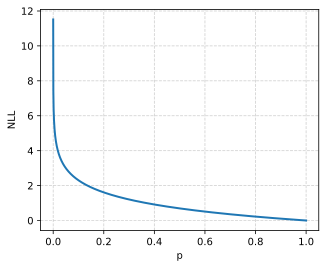

In [2]:
import numpy as np
eps = 1e-5
p = np.linspace(0 + eps, 1, 10000)
plt.figure(figsize=(5, 4))
plt.plot(p, -np.log(p), linewidth=2)
plt.grid(alpha=0.6, linestyle="dashed")
plt.xlabel("p"); plt.ylabel("NLL");

Meanwhile, looking at the gradient, the NLL has the nice property that it does not saturate as it approaches perfect prediction:

$$\frac{\partial\ell_{\text{NLL}}}{\partial p_y} = -\frac{1}{p_y}.$$

## Optimization problem

The third ingredient of a machine learning algorithm is a method for solving the
associated optimization problem, i.e. the problem of minimizing the average loss
on the training set:

$$
\begin{equation}
\hat{\Theta} = \underset{\Theta}{\operatorname{min}} \frac{1}{N} \sum_{i=1}^N \ell_{\text{CE}} (h_\Theta(\mathbf{x}_i), y_i)
\end{equation}
$$

How do we find an optimal set of parameters $\hat{\Theta}$? 

### Gradient Descent

For a matrix-input, scalar-output function $f\colon \mathbb{R}^{d \times k} \to \mathbb{R}$ the **gradient** $\nabla_\Theta f(\Theta)$ is defined as the matrix of partial derivatives:

$$
\begin{equation}
\nabla_\Theta f(\Theta) =\left[\begin{array}{ccc}
\frac{\partial f(\Theta)}{\partial \Theta_{11}} & \cdots & \frac{\partial f(\Theta)}{\partial \Theta_{1 k}} \\
\vdots & \ddots & \vdots \\
\frac{\partial f(\Theta)}{\partial \Theta_{d 1}} & \cdots & \frac{\partial f(\Theta)}{\partial \Theta_{d k}}
\end{array}\right] \in \mathbb{R}^{d \times k}
\end{equation}.
$$

**NOTE:** $\nabla_\Theta f$ always has the same shape as $\Theta$ when $f$ is a scalar.

From the multivariate Taylor expansion 

$$
f(\Theta + \Delta \Theta) \approx f(\Theta) + \nabla_\Theta f(\Theta) \cdot \Delta\Theta + \mathcal{O}(\Delta\Theta^2).
$$

So that the gradient locally points in the direction that most increases $f$, i.e. to first order. Hence, to minimize $f$, we iteratively update the weight by $-\nabla_\Theta f$ at each point in the surface defined by $f$:

$$
\Theta_{t + 1} = \Theta_t - \alpha \cdot \nabla_\Theta f (\Theta_t)
$$

where $\alpha > 0$ is called the **learning rate**. GD naturally is sensitive to the scale of the learning rate:

<img src=img/02-3.png>

### Stochastic Gradient Descent (SGD)

In practice, we don't typically want to compute the gradient using all examples to make a single update to the parameter. This is costly in cases where $N \gg 1$ which is typical in deep learning. Instead, we take many gradient steps where each update is based on a randomly sampled subset **mini-batch** $\mathcal{B} \subset \mathcal{D}$ where $B = |\mathcal{B}| \ll N.$ 


**Algorithm.** (SGD)
1. Sample $\mathcal{B} \subset \mathcal{D}$ so that we get $\mathbf{X}_\mathcal{B} \in \mathbb{R}^{B \times d}$ and $\mathbf{y} \in [K]^B.$
2. Update parameters: $$\begin{aligned}\Theta_{t + 1}
= \Theta_t - \frac{\alpha}{B} \, \sum_{b \in I_\mathcal{B}} \nabla_\Theta \ell (h_{\Theta_t}(\mathbf{x}_b), y_b).\end{aligned}$$

$\square$


It follows that the sample dataset varies at each training step. Unlike the previous case where $\mathcal{D}$ is fixed. This mechanism of SGD reduces overfitting by **implicit regularization** of the gradient, i.e. adding noise in the training process.

### Gradient of cross-entropy

How do we actually compute $\mathcal{L}_{\text{CE}}$? 
This can be done using the chain rule and tracking functional dependencies. Recall 

$$
\ell_{\text{CE}}(h_\Theta(\mathbf{x}), y) = -h_\Theta(\mathbf{x})_y + \log \sum_{j=1}^K \exp \left(h_\Theta(\mathbf{x})_j\right).
$$

Let's start by deriving the gradient of the softmax loss itself. For a vector $\mathbf{h} \in \mathbb{R}^K$:

$$
\frac{\partial \ell_{\text{CE}}}{\partial h_j} = - \delta_{yj} + \frac{\exp h_j}{\sum_{l=1}^K \exp h_l} = - \delta_{yj} + p_j.
$$

In vector form, $\nabla_{\mathbf{h}} \ell_{\text{CE}} = \mathbf{p} - \mathbf{e}_y$ where $\mathbf{e}_y$ is a one-hot vector with 1 on index $y.$

Next, to calculate the derivative with respect to $\Theta$, we use the chain rule:

$$
\frac{\partial \ell_{\text{CE}}}{\partial \Theta_{ul}} =  \frac{\partial \ell_{\text{CE}}}{\partial h_j} \frac{{\partial h_j}}{\partial \Theta_{ul}} = \underbrace{(p_l - \delta_{yl})}_{K-\text{dim}} \; \underbrace{\vphantom{(}x_u}_{d-\text{dim}}.
$$

For the dimensions to make sense, $\frac{\partial \ell_{\text{CE}}}{\partial \Theta} = \mathbf{x}(\mathbf{p} - \mathbf{e}_y)^\top$ in matrix form. Recall that our vectors are column vectors. Here the product reverses since we traverse the dependence backwards from the loss. 

**Batch form.** The same process works for a batch of inputs, except that we have an additional batch index which we sum over since $\ell$ depends on all input instances. The contribution of each input is matched and aggregated using matrix multiplication:

$$
\frac{\partial \mathcal{L}_{\text{CE}}}{\partial \Theta} = \frac{1}{B}\,\underbrace{\vphantom{(}\mathbf{X}^\top}_{d \times M} \;\; \underbrace{(\mathbf{P} - \mathbf{E}_{\mathbf{y}})}_{M \times K}.
$$

Here the transposes switched since $\mathbf{X}$ is constructed such that it has rows of $\mathbf{x}^\top,$ hence we internally get a double transpose. Putting it all together, we can write the SGD update rule for softmax regression as follows:

$$
\Theta_{t + 1} = \Theta_t - \frac{\alpha}{B} \cdot \mathbf{X}^\top (\mathbf{P} - \mathbf{E}_{\mathbf{y}}).
$$

Here we have $\frac{1}{B}$ since $\mathcal{L} = \frac{1}{B}\sum_b { \ell}_b.$ Also it makes sense to scale down since the sum grows with batch size $B.$

## Code implementation

We will train a classification model based on the SGD update rule above:

In [3]:
import torch
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # mean and std for MNIST
])

train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    root='./data',
    train=False,          # Specify test dataset
    download=True,
    transform=transform
)

Defining the linear model:

In [4]:
import torch.nn as nn
model = nn.Linear(784, 10, bias=False)

**Remark.** The linear model can be extended to have a bias vector $\beta$, so that  $h_\Theta = \mathbf{X}\Theta + \beta$ where $\beta \in \mathbb{R}^K.$ But it turns out there is a "bias trick" in deep learning where an additional dimension containing only $+1$ is added so that the input becomes of shape $(M, d + 1).$ For simplicity, we stick with no bias.

In [5]:
from torch.utils.data import DataLoader
from tqdm import tqdm
import torch.nn.functional as F

loss_train = []
N_EPOCHS = 5
B = 16
ALPHA = 0.01

@torch.no_grad()
def sgd_step(x, y):
    x = x.reshape(-1, 784)
    h = model(x)

    for theta in model.parameters():
        p = F.softmax(h, dim=1)
        e = F.one_hot(y, num_classes=10)
        g = x.T @ (p - e)

        theta -= ALPHA / B * g.T

    loss = -p[torch.arange(B), y].log().mean()
    return loss.item()


dl = DataLoader(train_dataset, batch_size=B, shuffle=True)  # shuffle for SGD!
for _ in tqdm(range(N_EPOCHS)):
    for x, y in dl:
        loss = sgd_step(x, y)
        loss_train.append(loss)

100%|██████████████████████████████████████████████████████████████| 5/5 [00:13<00:00,  2.72s/it]


**Remark.** Pytorch `nn.Linear` computes `x @ θ.T + b` hence we take `g.T` before updating the parameter `θ`.

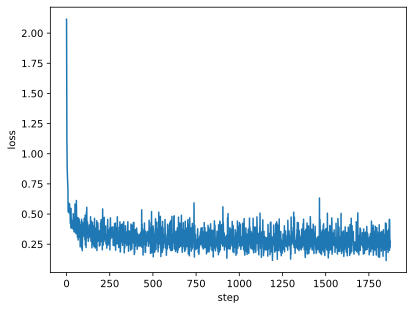

In [6]:
plt.plot(np.array(loss_train).reshape(-1, 10).mean(1))
plt.xlabel("step")
plt.ylabel("loss");

Label prediction sample:

Batch acc: 15/16 (93.75%)


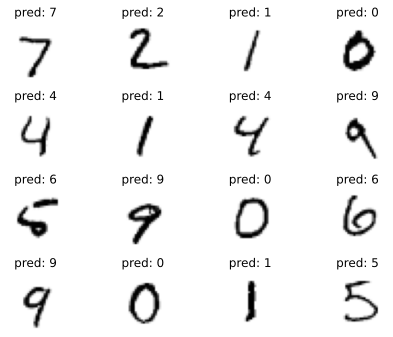

In [7]:
dv = DataLoader(test_dataset, batch_size=B, shuffle=False)
x, y = next(iter(dv))
out = model(x.reshape(B, -1)).argmax(1)
acc = (out == y).float()
print("Batch acc:", f"{acc.sum().int()}/{B}", f"({acc.mean().item() * 100}%)")

fig, ax = plt.subplots(4, 4)
for i in range(B):
    a, b = divmod(i, 4)
    ax[a, b].imshow(x[i].reshape(28, 28), cmap="Greys")
    ax[a, b].set_title(f"pred: {out[i]}")
    ax[a, b].axis("off")

fig.tight_layout()

**Test accuracy.** The practical goal of training is not actually to minimize $\mathcal{L}(h_\Theta, \mathcal{D}).$ But to minimize the loss for samples outside of the training dataset. That is, the model should be accurate on **test data**. If the model does not [overfit](https://en.wikipedia.org/wiki/Overfitting) and the test distribution does not drift too far from the training distribution, then we should be good. 

In [8]:
tot = 0
acc = 0
for x, y in dv:
    out = model(x.reshape(B, -1)).argmax(1)
    correct = (out == y).float()
    tot += len(y)
    acc += correct.sum()

print(f"Test acc: {acc / tot * 100:.2f}%")

Test acc: 92.23%


## Appendix: Model complexity


Since SGD relies on a stochastic process, the performance of the resulting trained model varies. How are we sure that we aren't just lucky for this particular run / random seed? What is the variance of the trained model performance over multiple runs? Is there a way to control this? This issue is at the core of learning theory and precisely what the [bias-variance tradeoff](https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote12.html) addresses. 

In practice, the crucial parameter to control is **model complexity**. Here **model capacity** or **complexity** is a measure of how complicated a pattern or relationship a model architecture can express. Let $h$ be the true function that underlies the task. If model capacity is sufficiently large, the **model class** $\mathcal{H} = \{h_{\Theta} \mid \Theta \in \mathbb{R}^d \}$ contains an approximation $\hat{h} \in \mathcal{H}$ such that $\| h - \hat{h} \| < \epsilon$ for a small enough $\epsilon > 0.$

The capacity of a model class can be controlled, for example, by the number of learnable parameters in practical architectures. It can also be constrained directly by applying **regularization** or certain **prior knowledge** such as invariances. This biases the model towards certain solutions, so these constraints are sometimes referred to as **inductive biases** &mdash; such knowledge is bias in the sense that it makes some solutions more likely, and others less likely. The tradeoff is that the model are steered to biased solutions more efficiently. 